# Cycle - 1

In [ ]:
!wget https://www.collinsdictionary.com/images/full/hill_341357132_1000.jpg -P /content/drive/MyDrive/data images # 'hill.jpg'

--2024-12-31 09:58:07--  https://www.collinsdictionary.com/images/full/hill_341357132_1000.jpg
Resolving www.collinsdictionary.com (www.collinsdictionary.com)... 104.18.13.203, 104.18.12.203, 2606:4700::6812:ccb, ...
Connecting to www.collinsdictionary.com (www.collinsdictionary.com)|104.18.13.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74587 (73K) [image/jpeg]
Saving to: ‘/content/drive/MyDrive/data/hill_341357132_1000.jpg.1’

hill_341357132_1000 100%[===================>]  72.84K  --.-KB/s    in 0.02s   

2024-12-31 09:58:07 (3.42 MB/s) - ‘/content/drive/MyDrive/data/hill_341357132_1000.jpg.1’ saved [74587/74587]

--2024-12-31 09:58:07--  http://images/
Resolving images (images)... failed: Name or service not known.
wget: unable to resolve host address ‘images’
FINISHED --2024-12-31 09:58:07--
Total wall clock time: 0.2s
Downloaded: 1 files, 73K in 0.02s (3.42 MB/s)


In [ ]:
!wget https://wallpapers.com/images/featured/flower-pictures-unpxbv1q9kxyqr1d.jpg -P /content/drive/MyDrive/data images/
!wget https://medlineplus.gov/images/Xray_share.jpg -P /content/drive/MyDrive/data images/
!wget https://storage.googleapis.com/p-oaf-ibe-back-00e-strapi-uploads/ID_6_Banner_San_Diego_PHR_1_B_20150724_47f7833729/ID_6_Banner_San_Diego_PHR_1_B_20150724_47f7833729.jpg -P /content/drive/MyDrive/data images/

--2024-10-07 12:15:38--  https://wallpapers.com/images/featured/flower-pictures-unpxbv1q9kxyqr1d.jpg
Resolving wallpapers.com (wallpapers.com)... 13.35.166.2, 13.35.166.104, 13.35.166.48, ...
Connecting to wallpapers.com (wallpapers.com)|13.35.166.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27720 (27K) [image/jpeg]
Saving to: ‘/content/drive/MyDrive/data/flower-pictures-unpxbv1q9kxyqr1d.jpg’

flower-pictures-unp 100%[===================>]  27.07K  --.-KB/s    in 0s      

2024-10-07 12:15:38 (161 MB/s) - ‘/content/drive/MyDrive/data/flower-pictures-unpxbv1q9kxyqr1d.jpg’ saved [27720/27720]

--2024-10-07 12:15:38--  http://images/
Resolving images (images)... failed: Name or service not known.
wget: unable to resolve host address ‘images’
FINISHED --2024-10-07 12:15:38--
Total wall clock time: 0.4s
Downloaded: 1 files, 27K in 0s (161 MB/s)
--2024-10-07 12:15:38--  https://medlineplus.gov/images/Xray_share.jpg
Resolving medlineplus.gov (medlineplus.gov)...

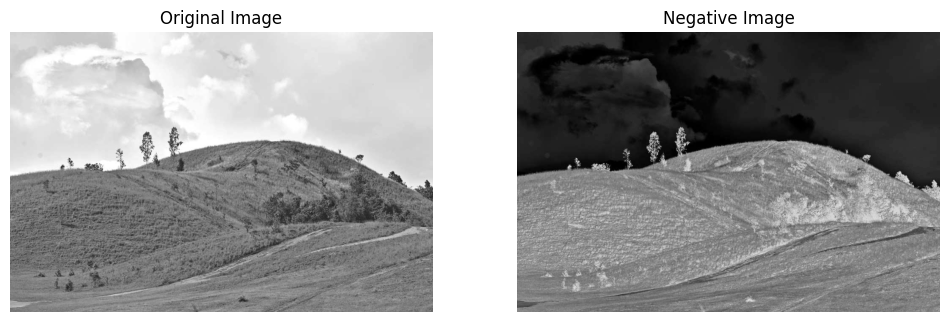

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def image_negative(image):
    return 255 - image

# Load a grayscale image
image = cv2.imread("/content/drive/MyDrive/data/hill_341357132_1000.jpg", cv2.IMREAD_GRAYSCALE) # 'grayscale_image.jpg'

# Apply negative transformation
negative_image = image_negative(image)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Negative Image')
plt.imshow(negative_image, cmap='gray')
plt.axis('off')

plt.show()

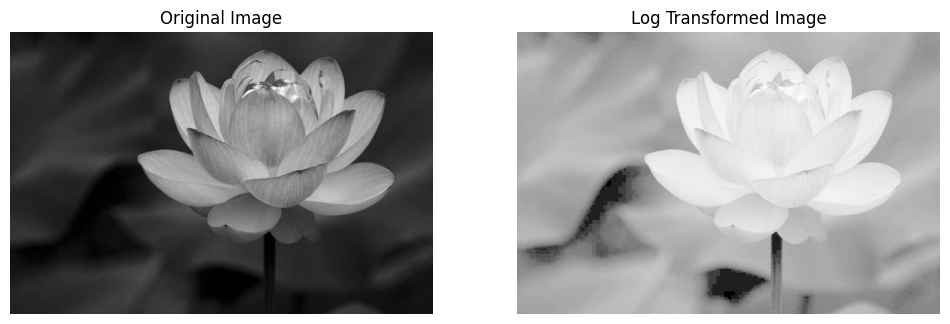

In [ ]:
def log_transformation(image, c=1.0):
    # Convert image to float32 to avoid truncation errors
    image_float = np.float32(image)
    # Apply log transformation
    log_image = c * np.log(1 + image_float)
    # Normalize to 0-255
    log_image = np.uint8(255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image)))
    return log_image

# Load a grayscale image with low gray-level values
image = cv2.imread('/content/drive/MyDrive/data/flower-pictures-unpxbv1q9kxyqr1d.jpg', cv2.IMREAD_GRAYSCALE) # 'low_contrast_image.jpg'

# Apply log transformation
log_image = log_transformation(image, c=10.0)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Log Transformed Image')
plt.imshow(log_image, cmap='gray')
plt.axis('off')

plt.show()

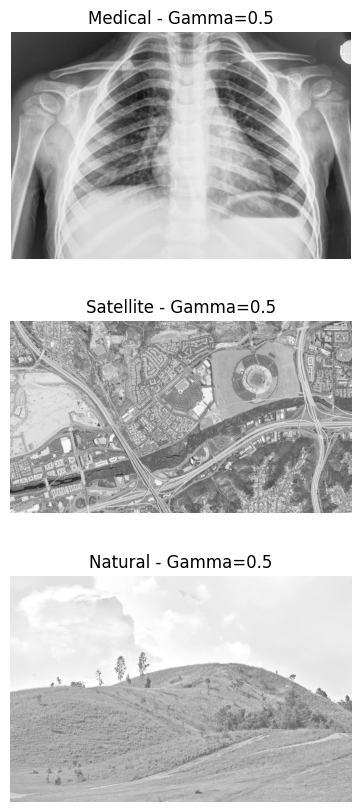

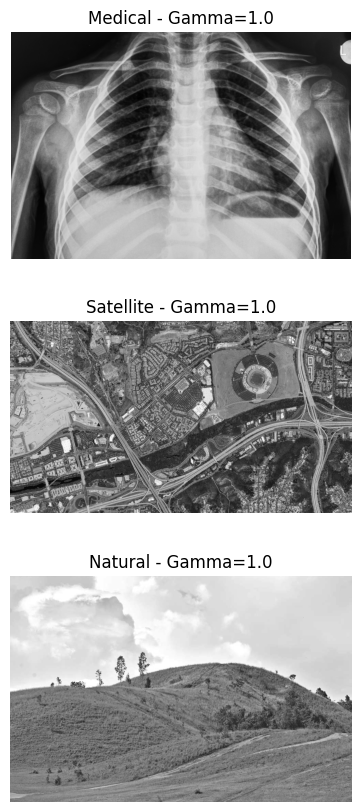

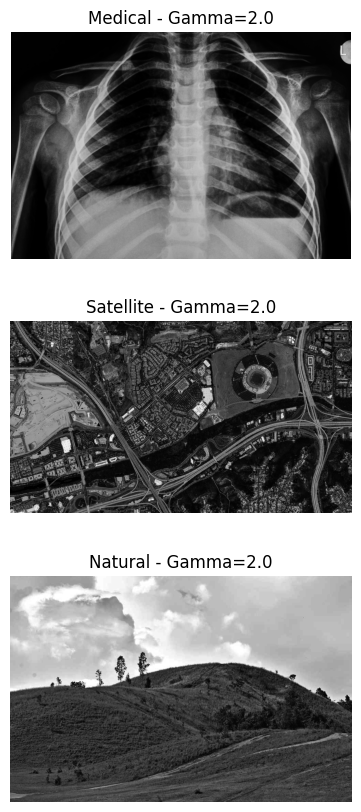

In [ ]:
def power_law_transformation(image, gamma=1.0, c=1.0):
    # Convert image to float32
    image_float = np.float32(image) / 255.0
    # Apply power-law transformation
    power_law_image = c * np.power(image_float, gamma)
    # Normalize to 0-255
    power_law_image = np.uint8(255 * power_law_image)
    return power_law_image

# Load different types of images
images = {
    'Medical': cv2.imread('/content/drive/MyDrive/data/Xray_share.jpg', cv2.IMREAD_GRAYSCALE), # 'medical_image.jpg'
    'Satellite': cv2.imread('/content/drive/MyDrive/data/ID_6_Banner_San_Diego_PHR_1_B_20150724_47f7833729.jpg', cv2.IMREAD_GRAYSCALE), # 'satellite_image.jpg'
    'Natural': cv2.imread('/content/drive/MyDrive/data/hill_341357132_1000.jpg', cv2.IMREAD_GRAYSCALE) # 'natural_image.jpg'
}

gammas = [0.5, 1.0, 2.0]

for gamma in gammas:
    plt.figure(figsize=(15, 10))
    for i, (title, image) in enumerate(images.items()):
        transformed_image = power_law_transformation(image, gamma)
        plt.subplot(len(images), len(gammas), i*len(gammas) + gammas.index(gamma) + 1)
        plt.title(f'{title} - Gamma={gamma}')
        plt.imshow(transformed_image, cmap='gray')
        plt.axis('off')

    plt.show()



### Spatial Filtering

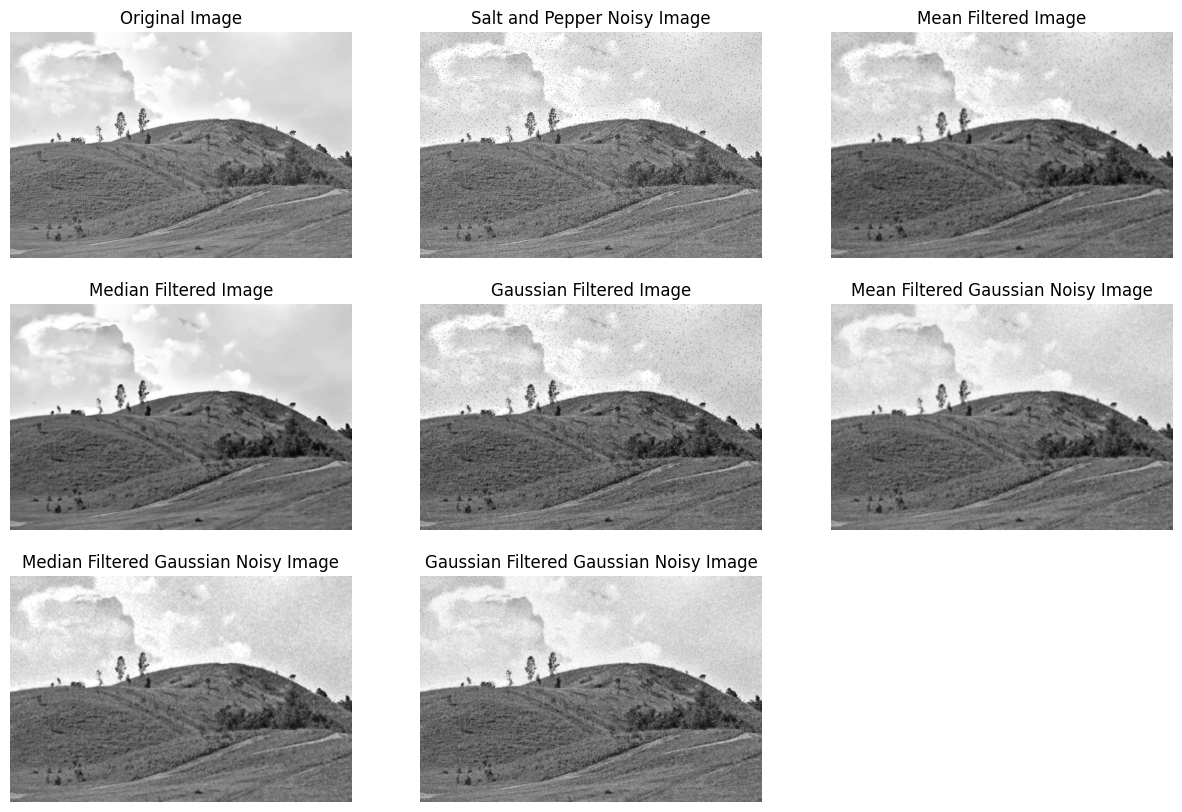

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob: float, pepper_prob: float):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(salt_prob * total_pixels)
    num_pepper = np.ceil(pepper_prob * total_pixels)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gauss)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image = cv2.imread('/content/drive/MyDrive/data/hill_341357132_1000.jpg', cv2.IMREAD_GRAYSCALE)

# Add noise to the image
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
gaussian_noisy_image = add_gaussian_noise(image)

# Apply filters
mean_filtered = cv2.blur(salt_and_pepper_noisy_image, (5, 5))
median_filtered = cv2.medianBlur(salt_and_pepper_noisy_image, 5)
gaussian_filtered = cv2.GaussianBlur(salt_and_pepper_noisy_image, (5, 5), 0)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Salt and Pepper Noisy Image')
plt.imshow(salt_and_pepper_noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Mean Filtered Image')
plt.imshow(mean_filtered, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Median Filtered Image')
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Gaussian Filtered Image')
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

# Apply filters
mean_filtered_gaussian = cv2.blur(gaussian_noisy_image, (5, 5))
median_filtered_gaussian = cv2.medianBlur(gaussian_noisy_image, 5)
gaussian_filtered_gaussian = cv2.GaussianBlur(gaussian_noisy_image, (5, 5), 0)

plt.subplot(3, 3, 6)
plt.title('Mean Filtered Gaussian Noisy Image')
plt.imshow(mean_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Median Filtered Gaussian Noisy Image')
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Gaussian Filtered Gaussian Noisy Image')
plt.imshow(gaussian_filtered_gaussian, cmap='gray')
plt.axis('off')

plt.show()

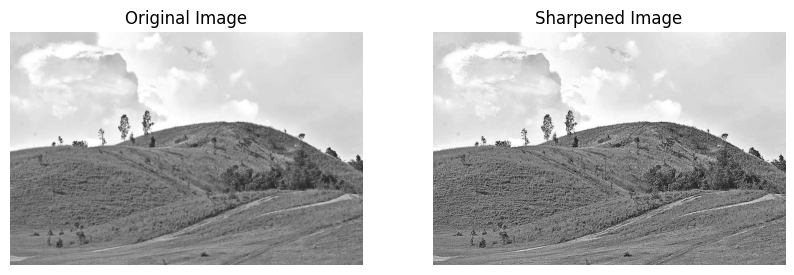

In [ ]:

sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

# Apply the sharpening filter
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()

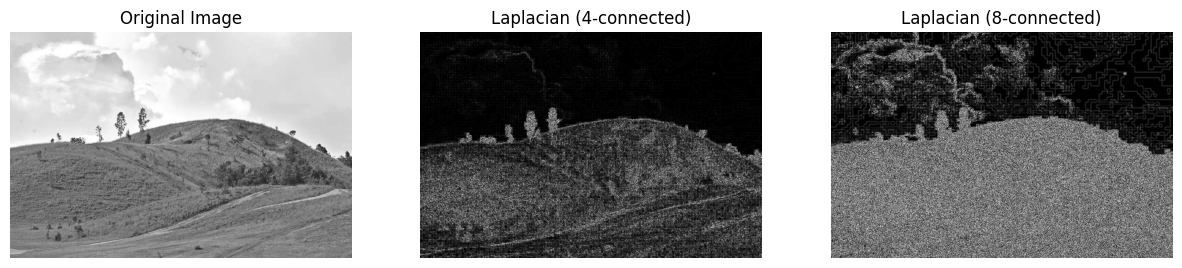

In [ ]:
# Apply Laplacian operator (4-connected)
laplacian_4_connected = cv2.Laplacian(image, cv2.CV_64F, ksize=3, borderType=cv2.BORDER_DEFAULT)

# Apply Laplacian operator (8-connected)
laplacian_8_connected = cv2.Laplacian(image, cv2.CV_64F, ksize=5, borderType=cv2.BORDER_DEFAULT)

laplacian_4_connected = np.uint8(np.absolute(laplacian_4_connected))
laplacian_8_connected = np.uint8(np.absolute(laplacian_8_connected))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Laplacian (4-connected)')
plt.imshow(laplacian_4_connected, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Laplacian (8-connected)')
plt.imshow(laplacian_8_connected, cmap='gray')
plt.axis('off')

plt.show()